In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
chronic_df=pd.read_csv('kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Dataset Description


# Attributes info

In [3]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# #Data Cleaning

In [4]:
#drop col
chronic_df=chronic_df.drop(columns="id",axis=1)

In [5]:
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
#rename columns names to make it more user-friendly
chronic_df.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps',
                    'bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hemoglobin',
                    'packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes mellitus',
                    'coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [7]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

# according to the data description

In [9]:
# cols like specific_gravity , albumin , albumin and sugar which is floattype right now 
#converting back into nominal data type categorical
chronic_df[['specific_gravity','albumin','sugar']] = chronic_df[['specific_gravity','albumin','sugar']].astype('object')

In [10]:
chronic_df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [11]:
#converting the columns like packed_cell_volume ,white_blood_cell_count and red_blood_cell_count into the numberical type
chronic_df['packed_cell_volume'] =pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')


In [12]:
chronic_df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [13]:
chronic_df['white_blood_cell_count'] =pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count'] =pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [14]:
# Extraction categorical and numerical columns
cat_col = [col for col in chronic_df.columns if chronic_df[col].dtype=='object']
num_col = [col for col in chronic_df.columns if chronic_df[col].dtype!='object']

In [15]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [37]:
num_col

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [17]:
#by looping & looking values in categorical columns
for col in cat_col:
    print(f"{col} has {chronic_df[col].unique()} Values\n")

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] Values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] Values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] Values

red_blood_cells has [nan 'normal' 'abnormal'] Values

pus_cell has ['normal' 'abnormal' nan] Values

pus_cell_clumps has ['notpresent' 'present' nan] Values

bacteria has ['notpresent' 'present' nan] Values

hypertension has ['yes' 'no' nan] Values

diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] Values

coronary_artery_disease has ['no' 'yes' '\tno' nan] Values

appetite has ['good' 'poor' nan] Values

pedal_edema has ['no' 'yes' nan] Values

anemia has ['no' 'yes' nan] Values

class has ['ckd' 'ckd\t' 'notckd'] Values



In [18]:
#replace incorrect values like , 'yes' ,'\tno' '\tyes'  '\tno' 'ckd\t' 'notckd'
chronic_df['diabetes mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [19]:
#converting target col class into 0(chronic kindney) and 1 (not a chronic kideny)
chronic_df['class'] = chronic_df['class'].map({'ckd':0,'notckd':1})

#convert the target cols in numerical col list
chronic_df['class'] = pd.to_numeric(chronic_df['class'],errors='coerce')

In [21]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [22]:
num_col

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

 # # EDA

<Figure size 2000x1200 with 0 Axes>

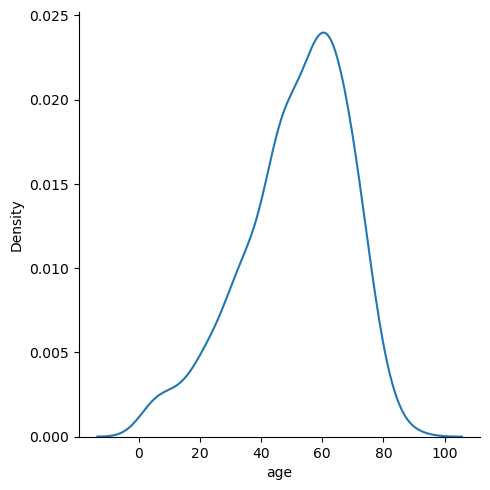

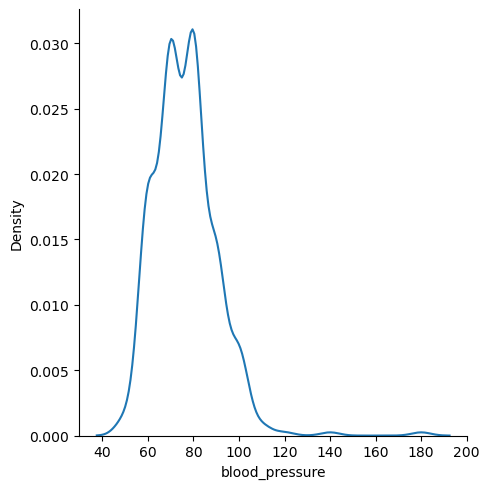

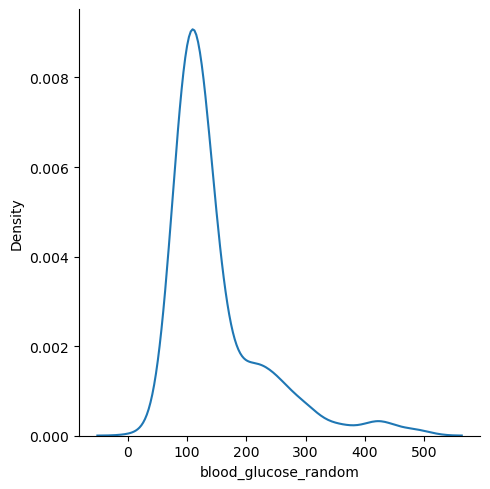

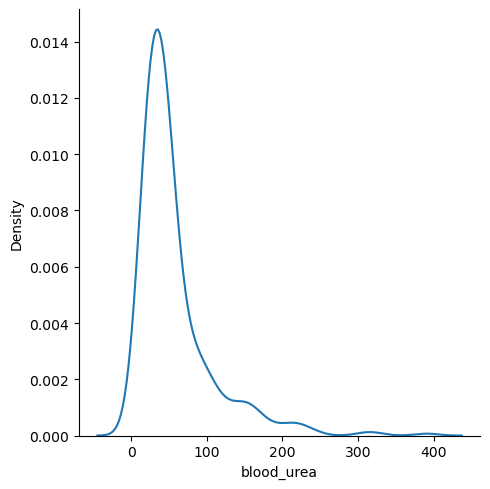

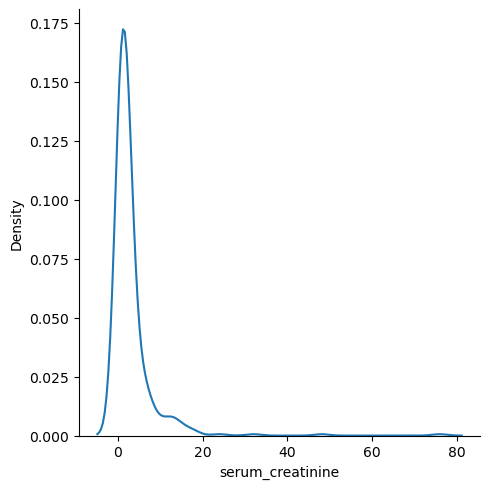

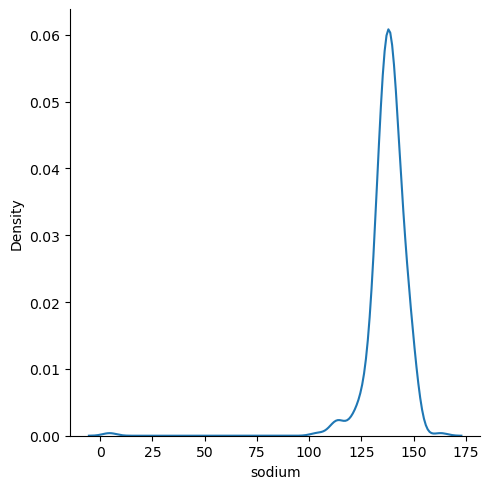

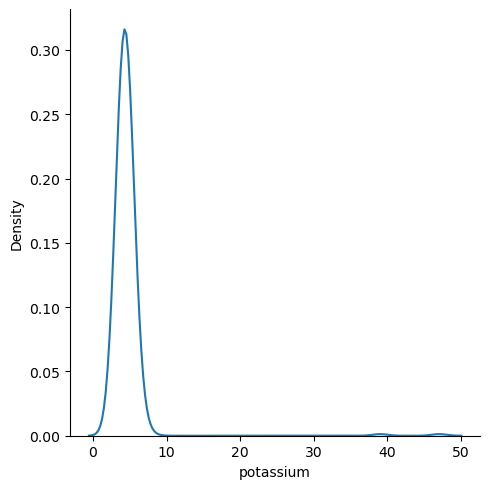

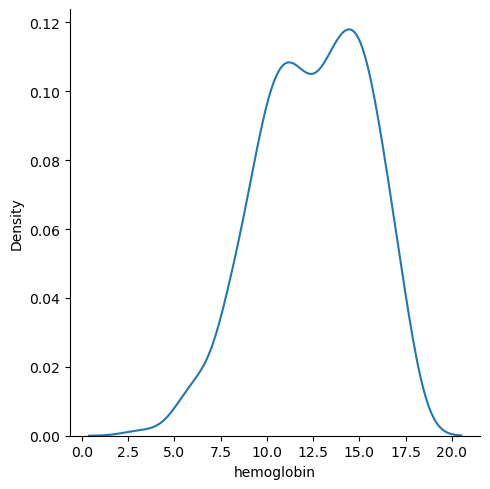

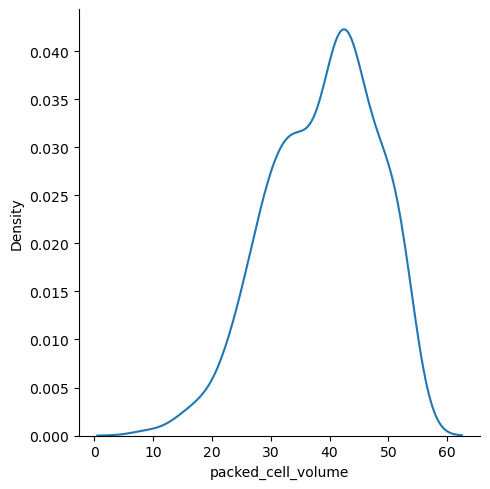

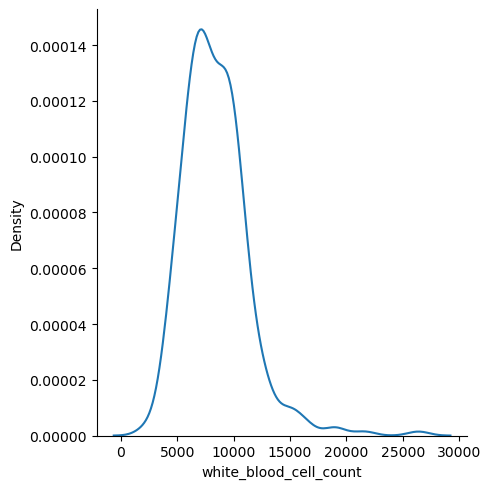

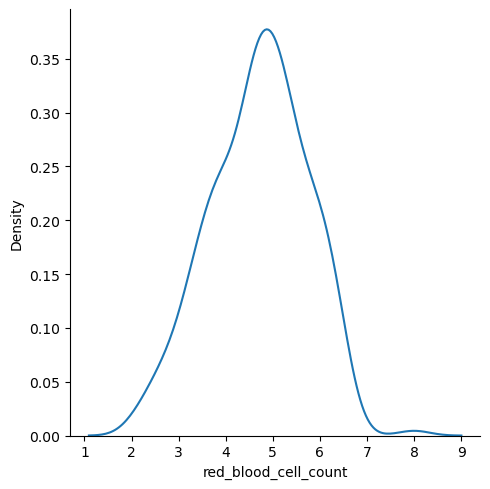

In [25]:
#checking numerical distribution
plt.figure(figsize=(20,12))
#looping over num cols and checking its distribution
for col in num_col:
    sns.displot(chronic_df[col],kind='kde')

In [26]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [32]:
chronic_df[['class']]

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


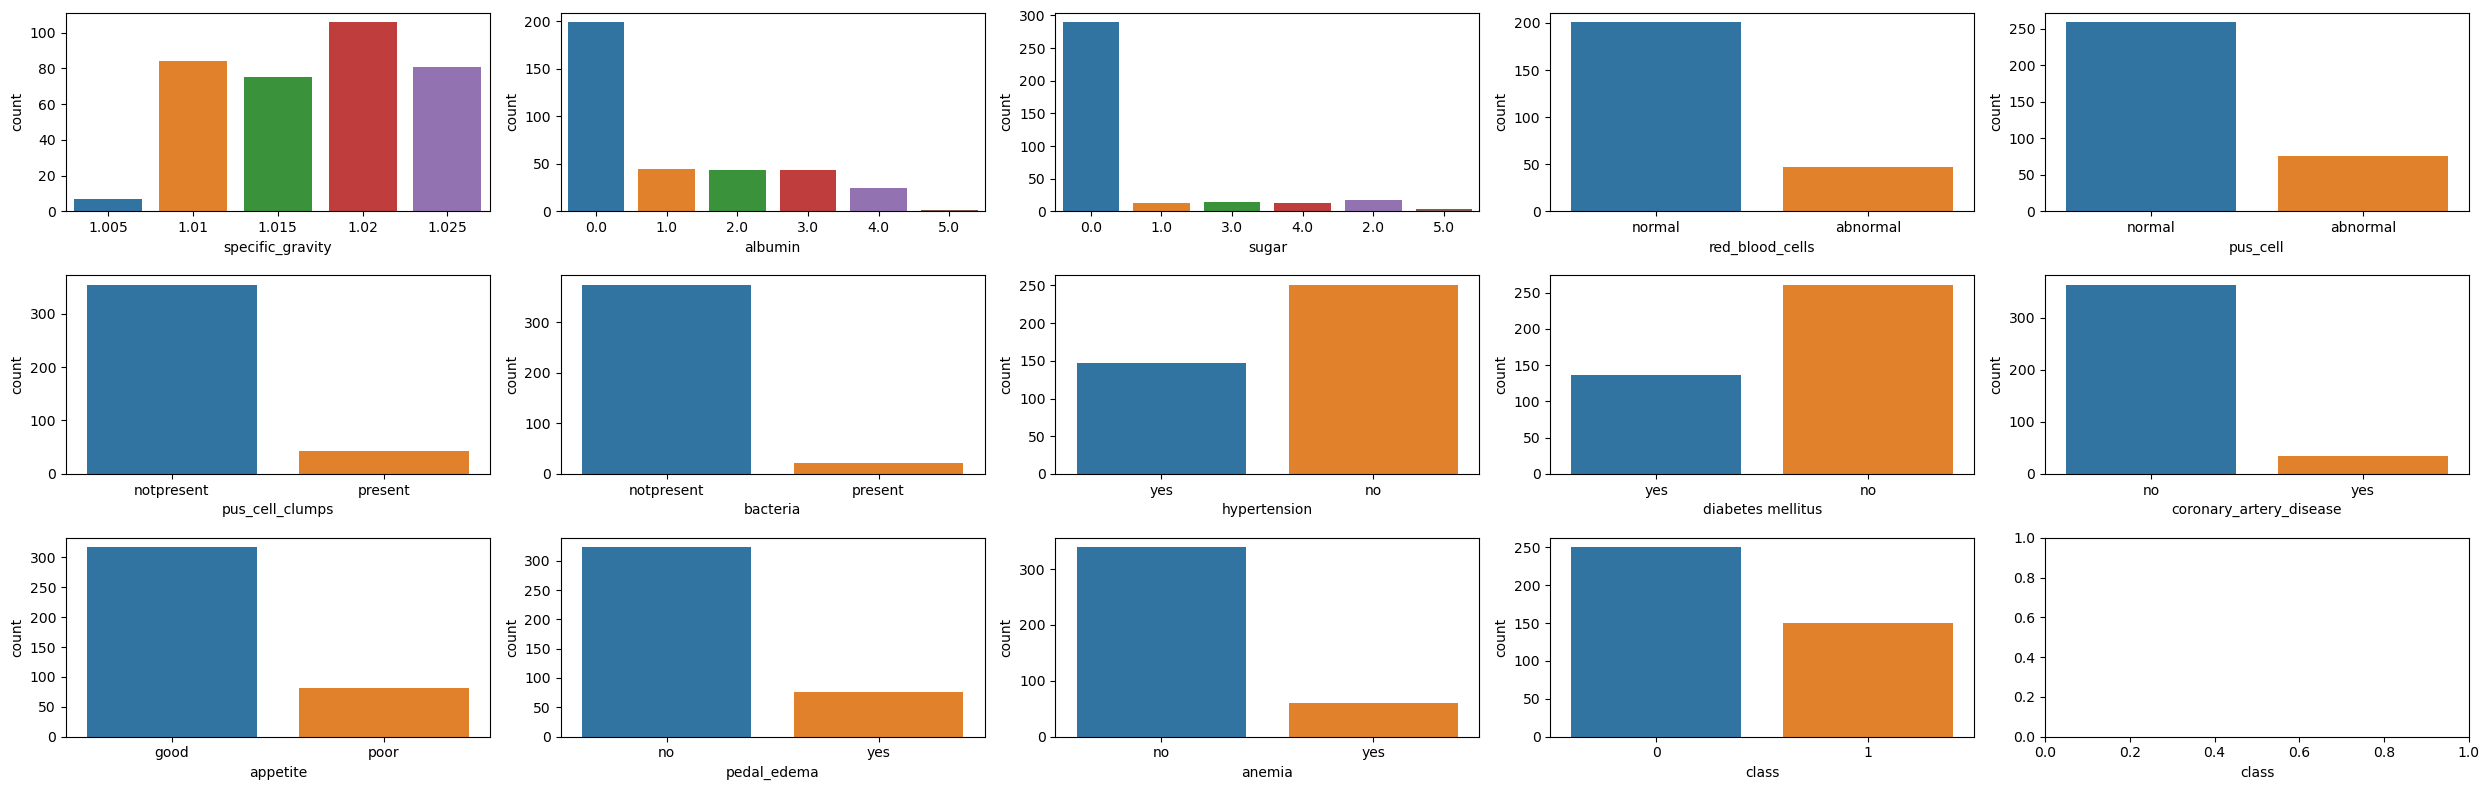

In [31]:
#checking cat feature distribution

#create the figure and axes
fig , axes = plt.subplots(3,5, figsize=(25,8))

axes = axes.ravel() #flattening the array makes indexing easier

#looping over cat cols and plot countplot

for col,ax in zip(cat_col,axes):
    sns.countplot(data=chronic_df,x=col,ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

<Axes: >

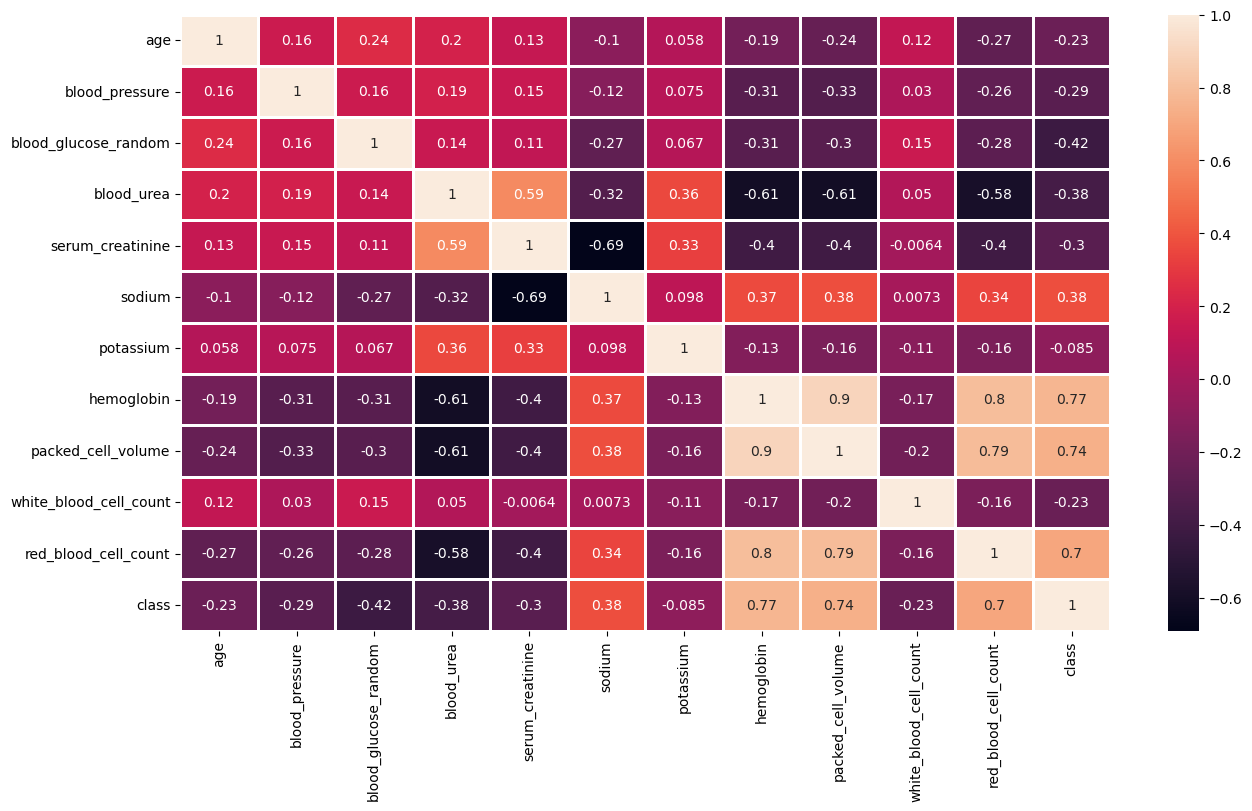

In [42]:
#correlation
numeric_columns = chronic_df.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))

sns.heatmap(numeric_columns.corr(),annot=True,linewidths=2)

In [40]:
numeric_columns.head()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,0
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0


In [41]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [46]:
#checking count of null values in whole df

null_counts = chronic_df.isna().sum().sort_values(ascending=False)
null_counts

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [48]:
#checking the count of null values in num_col

chronic_df[num_col].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [49]:
#checking the count of null values in cat_col

chronic_df[cat_col].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

# Missing Value Treatment

In [51]:
#filling null values , we will use two methods , random sampling for higher null values
#mean/mode sampling for lower values

#creating function for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(),feature] = random_sample
    
#creating function for imputing most common values(mode value)
def impute_mode(feature):
    mode=chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [52]:
#filling num_cols null values using random sampling method
for col in num_col:
    random_value_imputation(col)

In [53]:
#checking the count of null values in num_col

chronic_df[num_col].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [55]:
#filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_col mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')



In [56]:
#filling cat_col values with mode imputation
for col in cat_col:
    impute_mode(col)

In [57]:
#checking the count of null values in cat_col

chronic_df[cat_col].isna().sum().sort_values(ascending=False)

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [58]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,89.0,...,38.0,6000.0,6.0,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.6,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [80]:
chronic_df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [59]:
#check unique values in each cat col by looping over cat cols
for col in cat_col:
    print(f"{col} has {chronic_df[col].nunique()} categories")

specific_gravity has 5 categories
albumin has 6 categories
sugar has 6 categories
red_blood_cells has 2 categories
pus_cell has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 2 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
pedal_edema has 2 categories
anemia has 2 categories
class has 2 categories


In [60]:
#using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_col[3:]:
    chronic_df[col]=le.fit_transform(chronic_df[col])

In [61]:
#check chronic df after transforming cat cols
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,89.0,...,38.0,6000.0,6.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


# # Model Building

In [62]:
#split data into feature and target variable (X and y)
X=chronic_df.drop('class',axis=1)
y=chronic_df['class']

In [70]:
#splitting data into training and test set , so import train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=24)

In [84]:
#!pip install --upgrade scikit-learn

In [86]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

# accuracy score , confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test,dtc.predict(X_test))
print(dtc_acc)

print("---------")

print(f"Traning Accuracy of dtc is {accuracy_score(y_train,dtc.predict(X_train))}")
print("---------------")
print(f"Testing Accuracy of dtc is {accuracy_score(y_test,dtc.predict(X_test))}")
print("---------------")
print(f"Confusion Matrix :- {confusion_matrix(y_test,dtc.predict(X_test))}")
print("---------------")
print(f"Classification Report :- {classification_report(y_test,dtc.predict(X_test))}")


0.9416666666666667
---------
Traning Accuracy of dtc is 1.0
---------------
Testing Accuracy of dtc is 0.9416666666666667
---------------
Confusion Matrix :- [[76  5]
 [ 2 37]]
---------------
Classification Report :-               precision    recall  f1-score   support

           0       0.97      0.94      0.96        81
           1       0.88      0.95      0.91        39

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.94      0.94       120



In [90]:
#hyper parameter turning of decision tree , import GridSearchCv
from sklearn.model_selection import GridSearchCV

grid_param={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}

#apply gridsearchcv with cv=5 , n_jobs= -1 ,verbose = 1
grid_search_dtc = GridSearchCV(dtc,grid_param,cv=5,n_jobs=-1,verbose=1)

grid_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\91952\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1493 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91952\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91952\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\91952\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91952\anaconda3\lib\site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [92]:
#print best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)

print("-----")

print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
-----
0.9928571428571429


In [93]:
#storing best estimator

dtc = grid_search_dtc.best_estimator_

#accuracy score , confusion matrix and classifiation report of decision tree
dtc_acc= accuracy_score(y_test , dtc.predict(X_test))

print(f"Traning Accuracy of Decision Tree Classifieris {accuracy_score(y_train,dtc.predict(X_train))}")
print("--------")
print(f"Test Accuracy of Tecision Tree Classifier is {dtc_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,dtc.predict(X_test))}")
print("----------")
print(f"Classification Report :- \n{classification_report(y_test,dtc.predict(X_test))}")

Traning Accuracy of Decision Tree Classifieris 0.9857142857142858
--------
Test Accuracy of Tecision Tree Classifier is 0.9333333333333333

Confusion Matrix :- 
[[78  3]
 [ 5 34]]
----------
Classification Report :- 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       0.92      0.87      0.89        39

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [96]:
#import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf=RandomForestClassifier()
rd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
#accuracy score,confusion matrix and classification report of RandomForestClassifier
rd_clf_acc=accuracy_score(y_test,rd_clf.predict(X_test))
print("------")

print(f"Traning Accuracy of RandomForestClassifier is {accuracy_score(y_train,rd_clf.predict(X_train))}")
print("--------")
print(f"Test Accuracy of RandomForestClassifier is {rd_clf_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,rd_clf.predict(X_test))}")
print("----------")
print(f"Classification Report :- \n{classification_report(y_test,rd_clf.predict(X_test))}")


------
Traning Accuracy of RandomForestClassifier is 1.0
--------
Test Accuracy of RandomForestClassifier is 0.9916666666666667

Confusion Matrix :- 
[[81  0]
 [ 1 38]]
----------
Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.97      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [99]:
#import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train,y_train)



C:\Users\91952\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         max_features='log2',
                                                         min_samples_leaf=2,
                                                         min_samples_split=5))

In [100]:
#accuracy score , confusion matrix and classification report of ada

ada_acc=accuracy_score(y_test,ada.predict(X_test))

print(f"Traning Accuracy of ada is {accuracy_score(y_train,ada.predict(X_train))}")
print("--------")
print(f"Test Accuracy of ada is {ada_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,ada.predict(X_test))}")
print("----------")
print(f"Classification Report :- \n{classification_report(y_test,ada.predict(X_test))}")


Traning Accuracy of ada is 1.0
--------
Test Accuracy of ada is 1.0

Confusion Matrix :- 
[[81  0]
 [ 0 39]]
----------
Classification Report :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [104]:
#import GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)



GradientBoostingClassifier()

In [105]:
#accuracy score , confusion matrix and classification report

gb_acc= accuracy_score(y_test,gb.predict(X_test))

print(f"Traning Accuracy of gb is {accuracy_score(y_train,gb.predict(X_train))}")
print("--------")
print(f"Test Accuracy of gb is {gb_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,gb.predict(X_test))}")
print("----------")
print(f"Classification Report :- \n{classification_report(y_test,gb.predict(X_test))}")


Traning Accuracy of gb is 1.0
--------
Test Accuracy of gb is 0.9833333333333333

Confusion Matrix :- 
[[80  1]
 [ 1 38]]
----------
Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [106]:
#import XGBCClassifier

from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic',learning_rate = 0.5,max_depth=5,n_estimators=150)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
#accuracy score , confusion matrix and classification report
xgb_acc=accuracy_score(y_test,xgb.predict(X_test))

print(f"Traning Accuracy of xgb is {accuracy_score(y_train,xgb.predict(X_train))}")
print("--------")
print(f"Test Accuracy of xgb is {xgb_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,xgb.predict(X_test))}")
print("----------")
print(f"Classification Report :- \n{classification_report(y_test,xgb.predict(X_test))}")


Traning Accuracy of xgb is 1.0
--------
Test Accuracy of xgb is 0.9833333333333333

Confusion Matrix :- 
[[80  1]
 [ 1 38]]
----------
Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [109]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0c/cd/a05bbb220e9b45b4cadcb22d5e801aeece7b301f5775d78e13972d0f60cf/catboost-1.2.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.1/101.0 MB 944.1 kB/s eta 0:01:47
   ---------------------------------------- 0.2/101.0 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.2/101.0 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.3/101.0 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.4/101.0 MB 1.2 MB/s eta 0:01:24
   ---------------------------------------- 0.5/101.0 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.5/101.0 MB 1.4 MB/s eta 0:01:14
   ------------

In [110]:
#import CatBoostClassifier

from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train,y_train)

Learning rate set to 0.408198
0:	learn: 0.2294589	total: 143ms	remaining: 1.29s
1:	learn: 0.1293974	total: 151ms	remaining: 604ms
2:	learn: 0.0770562	total: 158ms	remaining: 368ms
3:	learn: 0.0621077	total: 162ms	remaining: 244ms
4:	learn: 0.0459565	total: 169ms	remaining: 169ms
5:	learn: 0.0399042	total: 174ms	remaining: 116ms
6:	learn: 0.0306434	total: 178ms	remaining: 76.2ms
7:	learn: 0.0236492	total: 183ms	remaining: 45.8ms
8:	learn: 0.0185341	total: 189ms	remaining: 21ms
9:	learn: 0.0153662	total: 195ms	remaining: 0us


In [111]:
#accuracy score , confusion matrix and classification report

cat_acc=accuracy_score(y_test,cat.predict(X_test))

print(f"Trainig accuracy of cat boost classifier is {accuracy_score(y_train,cat.predict(X_train))}")
print("-----")

print(f"Testing accuracy of cat boost classifier is {cat_acc}\n")
print("-----")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,cat.predict(X_test))}\n")
print("-----")
print(f"Classification Report :- \n {classification_report(y_test,cat.predict(X_test))}")

Trainig accuracy of cat boost classifier is 1.0
-----
Testing accuracy of cat boost classifier is 0.9916666666666667

-----
Confusion Matrix :- 
[[81  0]
 [ 1 38]]

-----
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      0.97      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [112]:
#import ExtraTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [113]:
#accuracy score , confusion matrix and classification report

etc_acc=accuracy_score(y_test,etc.predict(X_test))

print(f"Trainig accuracy of etc is {accuracy_score(y_train,etc.predict(X_train))}")
print("-----")

print(f"Testing accuracy ofetc is {etc_acc}\n")
print("-----")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,etc.predict(X_test))}\n")
print("-----")
print(f"Classification Report :- \n {classification_report(y_test,etc.predict(X_test))}")

Trainig accuracy of etc is 1.0
-----
Testing accuracy ofetc is 1.0

-----
Confusion Matrix :- 
[[81  0]
 [ 0 39]]

-----
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [114]:
#import LGBMClassifier

from lightgbm import LGBMClassifier

lgbm=LGBMClassifier(learning_rate= 1)
lgbm.fit(X_train,y_train)

LGBMClassifier(learning_rate=1)

In [115]:
#accuracy score , confusion matrix and classification report

lgbm_acc=accuracy_score(y_test,lgbm.predict(X_test))

print(f"Trainig accuracy of lgbm is {accuracy_score(y_train,lgbm.predict(X_train))}")
print("-----")

print(f"Testing accuracy of lgbm is {lgbm_acc}\n")
print("-----")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test,lgbm.predict(X_test))}\n")
print("-----")
print(f"Classification Report :- \n {classification_report(y_test,lgbm.predict(X_test))}")

Trainig accuracy of lgbm is 1.0
-----
Testing accuracy of lgbm is 0.9833333333333333

-----
Confusion Matrix :- 
[[80  1]
 [ 1 38]]

-----
Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [119]:
#comparing all model accuracy by creating a df

models = pd.DataFrame({
    'Model':['Decision Tree Classifier','Random Forest Classifier','Ada Boost Classifier',
            'Gradient Boosting Classifier','XgBoost','Cat Boost',
            'Extra Trees Classifier'],
    'Score':[dtc_acc,rd_clf_acc,ada_acc,gb_acc,xgb_acc,cat_acc,etc_acc]
})

In [120]:
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Ada Boost Classifier,1.000000
6,Extra Trees Classifier,1.000000
1,Random Forest Classifier,0.991667
5,Cat Boost,0.991667
3,Gradient Boosting Classifier,0.983333
4,XgBoost,0.983333
0,Decision Tree Classifier,0.933333
